In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## load data from txt file
data = pd.read_csv('../data/author_lovuan.txt', sep='\t', header=None)

# separate data into 2 columns into community and its members
data = data[0].str.split('[', expand=True)
data = data[1].str.split(']', expand=True)
data.columns = ['community', 'members']

# data

In [3]:
## data of members credibility
data_credibility = pd.read_csv('../data/our_author_credibility_data_main.csv', names=['user_id', 'credibility'])
# data_credibility

In [4]:
d = {}
for i in range(len(data)):
    d[data['community'][i]] = data['members'][i].split(', ')
cred_d = {}
for j in d:
    cred = 0
    for k in d[j]:
        # print(int(k) in data_credibility['credibility'])
        if int(k) in data_credibility['user_id']:
            # print(k, data_credibility['credibility'][int(k)])
            cred += data_credibility['credibility'][int(k)]
    cred_d[j] = cred/len(d[j])
cred_d

{'0': 0.2513059065024346,
 '1': 0.3264002250617275,
 '2': 0.25330127583350154,
 '3': 0.2640114436184783,
 '4': 0.3221473024941974,
 '5': 0.3144754757931372,
 '6': 0.34258595913418854,
 '7': 0.2500320398130893,
 '8': 0.2939948875191222,
 '9': 0.2858811823222729,
 '10': 0.2916235643976604,
 '11': 0.27092313775356075,
 '12': 0.36302374887579975,
 '13': 0.36357677670747324,
 '14': 0.28450409160378726,
 '15': 0.3270199681626723,
 '16': 0.3586669820108446,
 '17': 0.294947425468775,
 '18': 0.38298856972047524,
 '19': 0.37806164890614263,
 '20': 0.46605093857155167,
 '21': 0.5114972755015078,
 '22': 0.6052493713790696,
 '23': 0.09021443000000001}

In [11]:
## convert dictionary to dataframe
cred_df = pd.DataFrame.from_dict(cred_d, orient='index')
cred_df.columns = ['credibility']
cred_df['members'] = [3168,2893,2662,2649,2575,2190,2079,1934,1842,1743,1592,1565,1530,1524,1511,1439,1396,1305,1141,1038,1005,985,906,663]
cred_df

,credibility,members
0,0.251306,3168
1,0.326400,2893
2,0.253301,2662
3,0.264011,2649
4,0.322147,2575
5,0.314475,2190
6,0.342586,2079
7,0.250032,1934
8,0.293995,1842
9,0.285881,1743


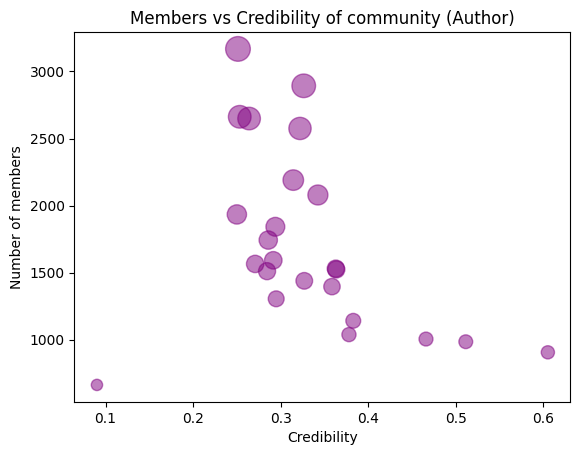

In [27]:
## plot graph modified scatter plot
# plt.figure(figsize=(10, 10))
plt.scatter(cred_df['credibility'], cred_df['members'], s=cred_df['members']/10, alpha=0.5, c='Purple')
plt.xlabel('Credibility')
plt.ylabel('Number of members')
plt.title('Members vs Credibility of community (Author)')
plt.show()

In [5]:
## load data from txt file
data_page = pd.read_csv('../data/page_lovuan.txt', sep='\t', header=None)

# separate data into 2 columns into community and its members
data_page = data_page[0].str.split('[', expand=True)
data_page = data_page[1].str.split(']', expand=True)
data_page.columns = ['community', 'members']

# data_page

In [6]:
## data of members credibility
data_credibility_page = pd.read_csv('../data/our_page_credibility_data_main.csv', names=['article_id', 'credibility'])

data_credibility_page['credibility'] = data_credibility_page['credibility']/data_credibility_page['credibility'].max()

data_credibility_page

,article_id,credibility
0,6,0.001245
1,8,0.001645
2,10,0.000336
3,12,1.000000
4,23,0.000088
...,...,...
1795,2994,0.019823
1796,2995,0.074824
1797,2997,0.004255
1798,2999,0.004985


In [7]:
d_page = {}
for i in range(len(data_page)):
    d_page[data_page['community'][i]] = data_page['members'][i].split(', ')
cred_d_page = {}
for j in d_page:
    cred = 0
    for k in d_page[j]:
        # print(int(k) in data_credibility['credibility'])
        if int(k) in data_credibility_page['article_id']:
            # print(k, data_credibility['credibility'][int(k)])
            cred += data_credibility_page['credibility'][int(k)]
    cred_d_page[j] = cred/len(d_page[j])
cred_d_page

{'0': 0.03519617760506761,
 '1': 0.04398168555949471,
 '2': 0.026059210511440216,
 '3': 0.03574236575131627,
 '4': 0.02428419680734772,
 '5': 0.013854383454211786}

In [17]:
## convert dictionary to dataframe
cred_df_page = pd.DataFrame.from_dict(cred_d_page, orient='index')
cred_df_page.columns = ['credibility']
cred_df_page['members'] = [452,151,90,84,24,8]
cred_df_page

,credibility,members
0,0.035196,452
1,0.043982,151
2,0.026059,90
3,0.035742,84
4,0.024284,24
5,0.013854,8


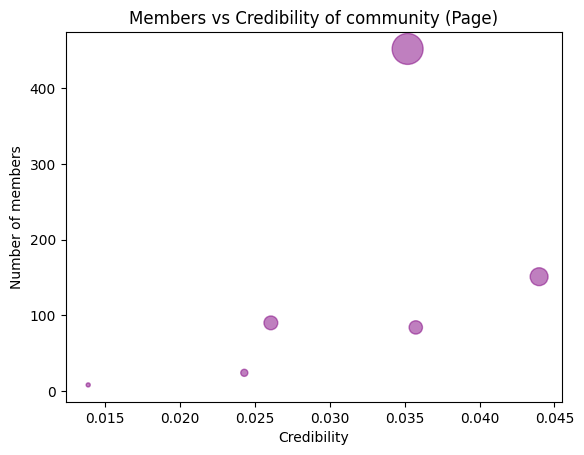

In [24]:

## plot graph modified scatter plot
# plt.figure(figsize=(10, 10))
plt.scatter(cred_df_page['credibility'], cred_df_page['members'], s=cred_df_page['members']*1.1, alpha=0.5, c='purple')
plt.xlabel('Credibility')
plt.ylabel('Number of members')
plt.title('Members vs Credibility of community (Page)')
plt.show()
